In [1]:
import cv2
import sys
sys.path.append("./TagDetection/")
from apriltag import Apriltag
from matplotlib import pyplot as plt

In [2]:
from readData import *
from showFig import *
from showCloud import *
from warp import *
from transform import Transformer


tf = Transformer()


In [3]:
def plotMarkers(frame, detections, name=None):
    plt.figure().set_size_inches(20, 10)
    plt.imshow(frame)
    # plt.gray()
    for detection in detections:
        convex = np.array(detection.points)
        showpoint = np.array(detection.markers)
        plt.plot(showpoint[:, 1], showpoint[:, 0], 'rx')
        plt.plot(convex[:, 0, 0], convex[:, 0, 1], 'b.')
    plt.imshow(frame)
    plt.gray()
    if name:
        plt.savefig(name)
    # plt.show()


def findMarker(num=4):
    ap = Apriltag()
    ap.create_detector(family='tag16h5', debug=False)
    for i in range(num):
        points, frame = getPoints("..\marker\marker%d.npy"%i)
        detections = ap.detect(frame)
        if len(detections) > 0:
            print(len(detections))
            print('%d 识别成功'%i)
            plotMarkers(frame, detections, "marker%d.png"%i)
        else:
            print('%d 识别失败'%i)



In [4]:
def matching(num=4, skip=50, debug=False):
    """
    num: number of pointclouds you want to match, must be continuous

    """
    ap = Apriltag()
    ap.create_detector(family='tag16h5', debug=False)
    tf = Transformer()
    clouds = None
    lastdetections = None
    lastcloud = None
    for i in range(num):
        cloud, frame = getPoints("..\marker\marker%d.npy"%i)
        detections = ap.detect(frame)
        if len(detections) > 0:
            if debug:
                print(len(detections))
                print('识别成功')
                plotMarkers(frame, detections[:2])
        else:
            print('识别失败')
            break

        if lastdetections:
            ## pix -> 3D points
            points = tf.TAGpix2point(detections[0].points, cloud)
            points += tf.TAGpix2point(detections[1].points, cloud)
            tf.src = np.asarray(points)
            points = tf.TAGpix2point(lastdetections[-2].points, lastcloud)
            points += tf.TAGpix2point(lastdetections[-1].points, lastcloud)
            tf.tgt = np.asarray(points)
            ## fit transform matrx
            tf.fit()
            transCloud = tf.transform(cloud)
            ## colorize and add to clouds
            cpoints = addColor(transCloud, frame)
            dcloud = filterPoints(cpoints, (800, 600, (-100, -30)), skip=skip)
            clouds = np.vstack([clouds, dcloud])

        else:
            ## colorize and add to clouds
            cpoints = addColor(cloud, frame)
            dcloud = filterPoints(cpoints, (300, 150, (-100, -30)), skip=skip)
            clouds = dcloud

        if debug:
            print(tf.T)

        lastdetections = detections
        lastcloud = cloud

    tf.clear()
    if debug:
        fig = dynVisual([clouds], ["merged"], zaugment=2, s=3)
        fig.write_html("all.html")
    return clouds

read in ..\marker\marker0.npy
x range: -196 ~ 1216
y range: -901 ~ 145
z range: -9882 ~ 364
2
识别成功
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
read in ..\marker\marker1.npy
x range: -196 ~ 226
y range: -153 ~ 145
z range: -493 ~ -33
4
识别成功
[[ 9.97487511e-01 -5.55257491e-02  6.84966260e-03  0.00000000e+00]
 [ 5.09251250e-02  9.95834510e-01  7.35403133e-03  0.00000000e+00]
 [-4.85777475e-02 -8.16847887e-02  1.06372445e+00  0.00000000e+00]
 [ 6.02355170e+00  1.77203654e+02 -9.41950200e+00  1.00000000e+00]]
read in ..\marker\marker2.npy
x range: -31555 ~ 7962
y range: -5444 ~ 21668
z range: -67120 ~ 270526
4
识别成功
[[ 9.98188264e-01 -3.29272260e-02  2.83666359e-03  0.00000000e+00]
 [ 1.83926409e-02  9.90508933e-01  1.95245191e-02  0.00000000e+00]
 [-1.22402972e-01 -1.48205524e-01  1.13829258e+00  0.00000000e+00]
 [-9.74840154e+00  3.53366562e+02 -1.51869336e+01  1.00000000e+00]]
read in ..\marker\marker3.npy
x range: -197 ~ 544
y range: -263 ~ 145
z range: -3105 ~ 111
2
识别成功

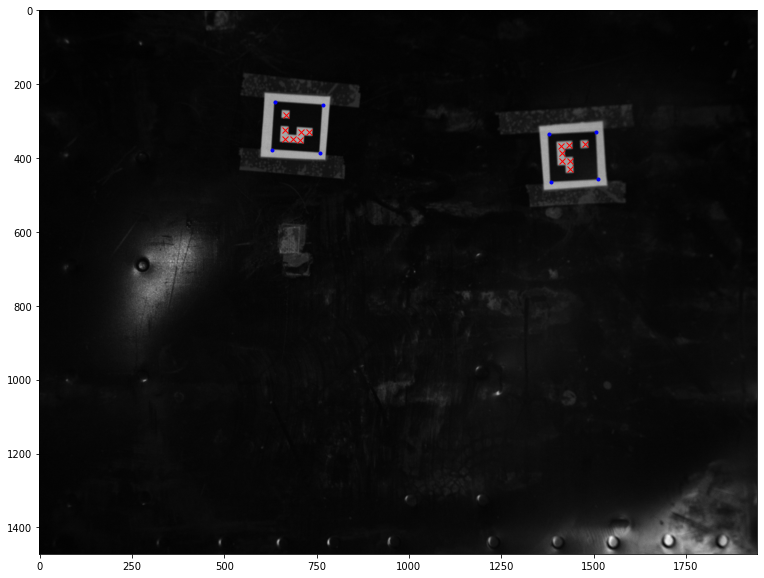

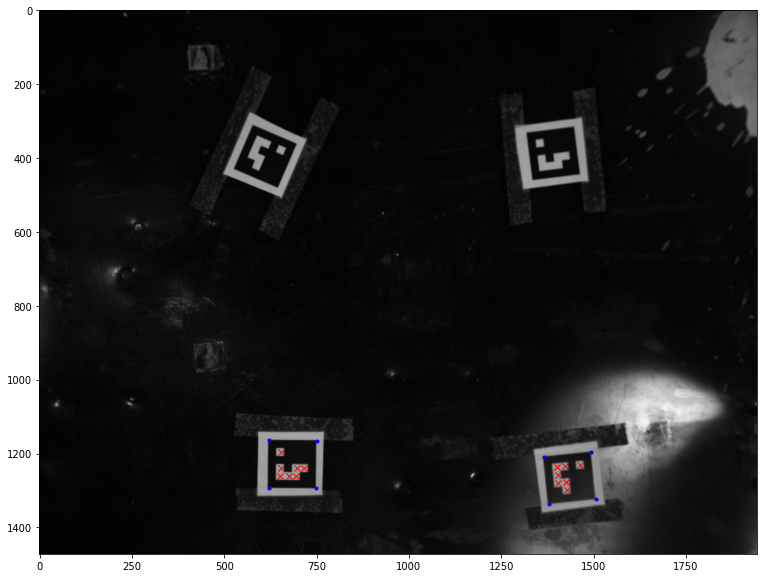

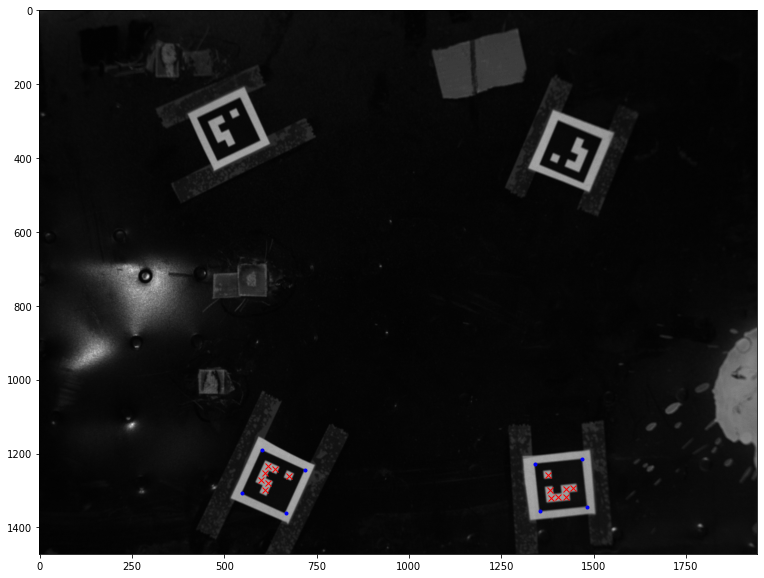

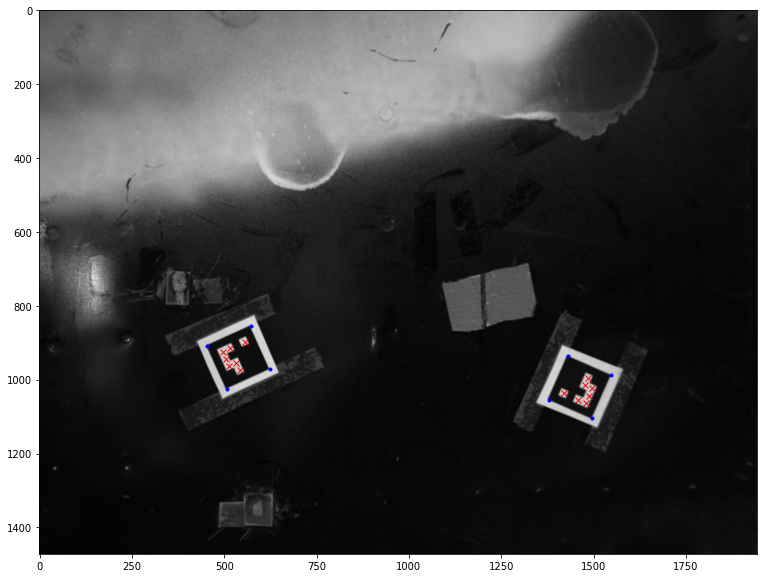

In [5]:
clouds = matching(4, skip=50, debug=True)
np.save("clouds.npy", clouds)

In [12]:
ap = Apriltag()
ap.create_detector(family='tag16h5', debug=False)

read in ..\marker\marker2.npy
x range: -31555 ~ 7962
y range: -5444 ~ 21668
z range: -67120 ~ 270526
4
识别成功


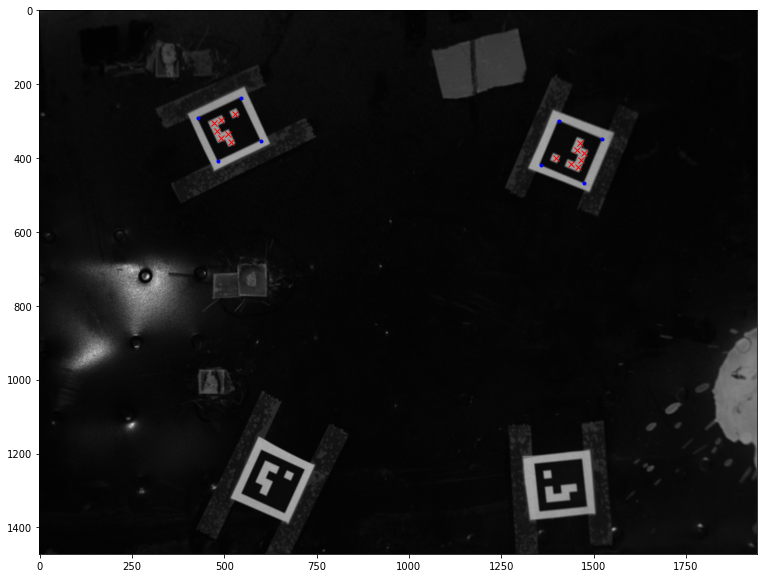

In [19]:
cloud0, frame0 = getPoints("..\marker\marker2.npy")
detections = ap.detect(frame0)
if len(detections) > 0:
    print(len(detections))
    print('识别成功')
    plotMarkers(frame0, detections[-2:])
    points = tf.TAGpix2point(detections[-2].points, cloud0)
    points += tf.TAGpix2point(detections[-1].points, cloud0)
    tf.tgt = np.asarray(points)
else:
    print('识别失败')

read in ..\marker\marker3.npy
x range: -197 ~ 544
y range: -263 ~ 145
z range: -3105 ~ 111
2
识别成功


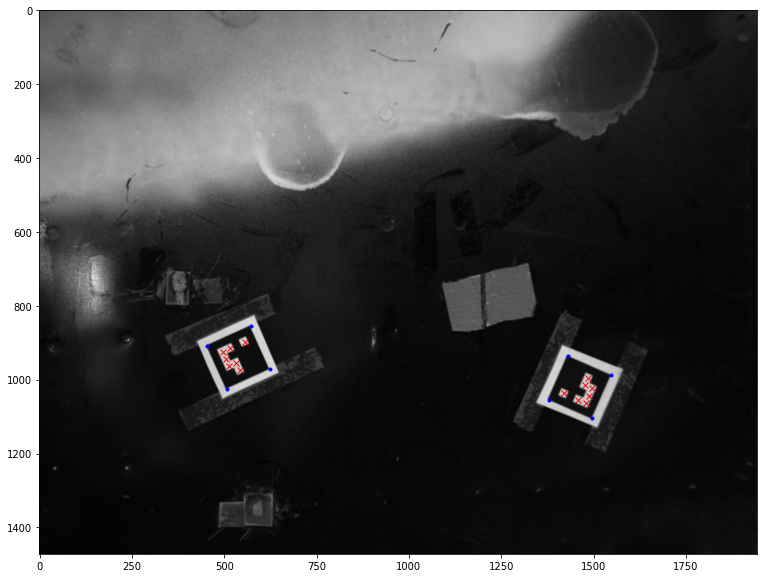

In [29]:
cloud1, frame1 = getPoints("..\marker\marker3.npy")
detections = ap.detect(frame1)
if len(detections) > 0:
    print(len(detections))
    print('识别成功')
    plotMarkers(frame1, detections[:2])
    points = tf.TAGpix2point(detections[0].points, cloud1)
    points += tf.TAGpix2point(detections[1].points, cloud1)
    tf.src = np.asarray(points)
else:
    print('识别失败')

In [21]:
T = tf.fit()
transCloud = tf.transform(cloud1)
tf.clear()

In [22]:
tf.tgt

array([[  88.97516 ,   84.33468 ,  -58.47467 ],
       [ 112.83548 ,   74.35938 ,  -57.18656 ],
       [ 102.99237 ,   50.50051 ,  -56.616135],
       [  79.07213 ,   60.27482 ,  -57.58496 ],
       [ -86.42961 ,   97.3055  ,  -64.63633 ],
       [ -75.246925,   73.71906 ,  -62.48718 ],
       [ -98.69315 ,   62.773   ,  -61.41796 ],
       [-109.68134 ,   86.556694,  -63.70345 ]], dtype=float32)

In [23]:
tf.src

array([[  93.677185,  -44.63476 ,  -48.945324],
       [ 117.32999 ,  -54.72474 ,  -47.68965 ],
       [ 107.03615 ,  -78.730034,  -46.955933],
       [  83.33702 ,  -68.41704 ,  -47.990875],
       [ -81.18565 ,  -28.417864,  -55.204956],
       [ -70.58236 ,  -51.998917,  -53.029655],
       [ -94.223816,  -62.697548,  -51.938843],
       [-105.018845,  -38.910828,  -53.96668 ]], dtype=float32)

In [27]:
cpoints0 = addColor(cloud0, frame0)
cpoints1 = addColor(transCloud, frame1)
dcloud0 = filterPoints(cpoints0, (400, 300, (-100, -30)), skip=20)
dcloud1 = filterPoints(cpoints1, (400, 300, (-100, -30)), skip=20)
fig = dynVisual([dcloud0, dcloud1], ["tgt", "src"], zaugment=0.5)
fig.write_html("merge.html")
